In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel("diminos_data.xlsx")

In [3]:
df

,order_id,order_placed_at,order_delivered_at
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619
...,...,...,...
14995,1538106,2023-03-27 23:37:05,2023-03-27 23:52:37.409
14996,1538107,2023-03-27 23:47:38,2023-03-28 00:04:22.673
14997,1538108,2023-03-27 23:50:16,2023-03-28 00:05:40.676
14998,1538109,2023-03-27 23:52:44,2023-03-28 00:08:41.810


In [4]:
for i in df.columns.tolist():
    print(i," : ",df[i].nunique())

order_id  :  15000
order_placed_at  :  14953
order_delivered_at  :  15000


In [5]:
df['order_time'] = pd.to_datetime(df['order_placed_at'])
df['deliver_time'] = pd.to_datetime(df['order_delivered_at'])

In [6]:
pf=df

In [7]:
df["time_re"]=df["deliver_time"]-df["order_time"]

In [8]:
pf["time_in_min"]=df['time_re'].dt.total_seconds() / 60

In [9]:
pf['time_in_hours']= df['time_re'].dt.total_seconds() / 3600

In [10]:
pf["time_in_min"]=pf["time_in_min"].round(0)

In [11]:
pf['time_in_hours']=pf['time_in_hours'].round(0)

In [12]:
pf.head()

,order_id,order_placed_at,order_delivered_at,order_time,deliver_time,time_re,time_in_min,time_in_hours
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443,2023-03-01 00:00:59,2023-03-01 00:18:07.443,0 days 00:17:08.443000,17.0,0.0
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925,2023-03-01 00:03:59,2023-03-01 00:19:34.925,0 days 00:15:35.925000,16.0,0.0
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291,2023-03-01 00:07:22,2023-03-01 00:22:28.291,0 days 00:15:06.291000,15.0,0.0
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019,2023-03-01 00:07:47,2023-03-01 00:46:19.019,0 days 00:38:32.019000,39.0,1.0
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619,2023-03-01 00:09:03,2023-03-01 00:25:13.619,0 days 00:16:10.619000,16.0,0.0


In [13]:
gf=pf.groupby("time_in_hours").count()["order_id"].reset_index(name="total_no._order_in_hr")

In [14]:
gf

,time_in_hours,total_no._order_in_hr
0,0.0,14396
1,1.0,507
2,2.0,44
3,3.0,21
4,4.0,11
5,5.0,4
6,6.0,2
7,7.0,1
8,9.0,2
9,11.0,1


<AxesSubplot: xlabel='time_in_hours', ylabel='total_no._order_in_hr'>

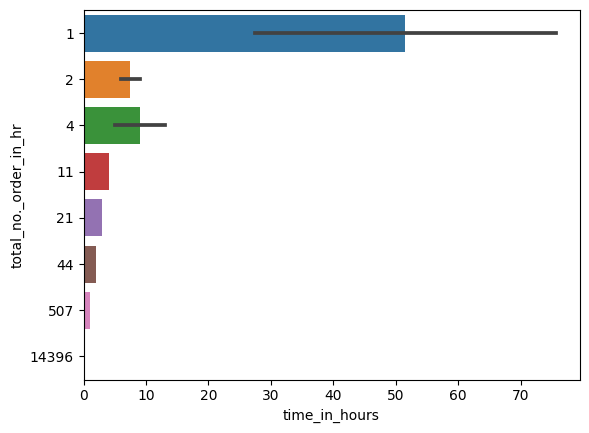

In [15]:
sns.barplot(x="time_in_hours",y="total_no._order_in_hr",orient='h',data=gf)

In [16]:
14396/15000

0.9597333333333333

maximum order are placed in 1 hour of time i.e about 95.97%

In [17]:
gf2=pf.groupby("time_in_min").count()["order_id"].reset_index(name="total_no._order_in_min")

In [18]:
gf2

,time_in_min,total_no._order_in_min
0,15.0,5718
1,16.0,4170
2,17.0,1665
3,18.0,867
4,19.0,557
...,...,...
144,2883.0,1
145,3888.0,1
146,4486.0,1
147,5867.0,1


In [19]:
gf3=gf2[["time_in_min","total_no._order_in_min"]][gf2["time_in_min"]<60]

In [20]:
gf3.sort_values(by="total_no._order_in_min",ascending=False)

,time_in_min,total_no._order_in_min
0,15.0,5718
1,16.0,4170
2,17.0,1665
3,18.0,867
4,19.0,557
5,20.0,345
6,21.0,272
7,22.0,187
8,23.0,145
9,24.0,116


In [34]:
pf['time_in_min'].quantile(0.95)

27.0

Here,mainly most of order are getting placed within 24min.

In [35]:
gf4=gf2[["time_in_min","total_no._order_in_min"]][gf2["time_in_min"]<27]

<AxesSubplot: xlabel='time_in_min', ylabel='total_no._order_in_min'>

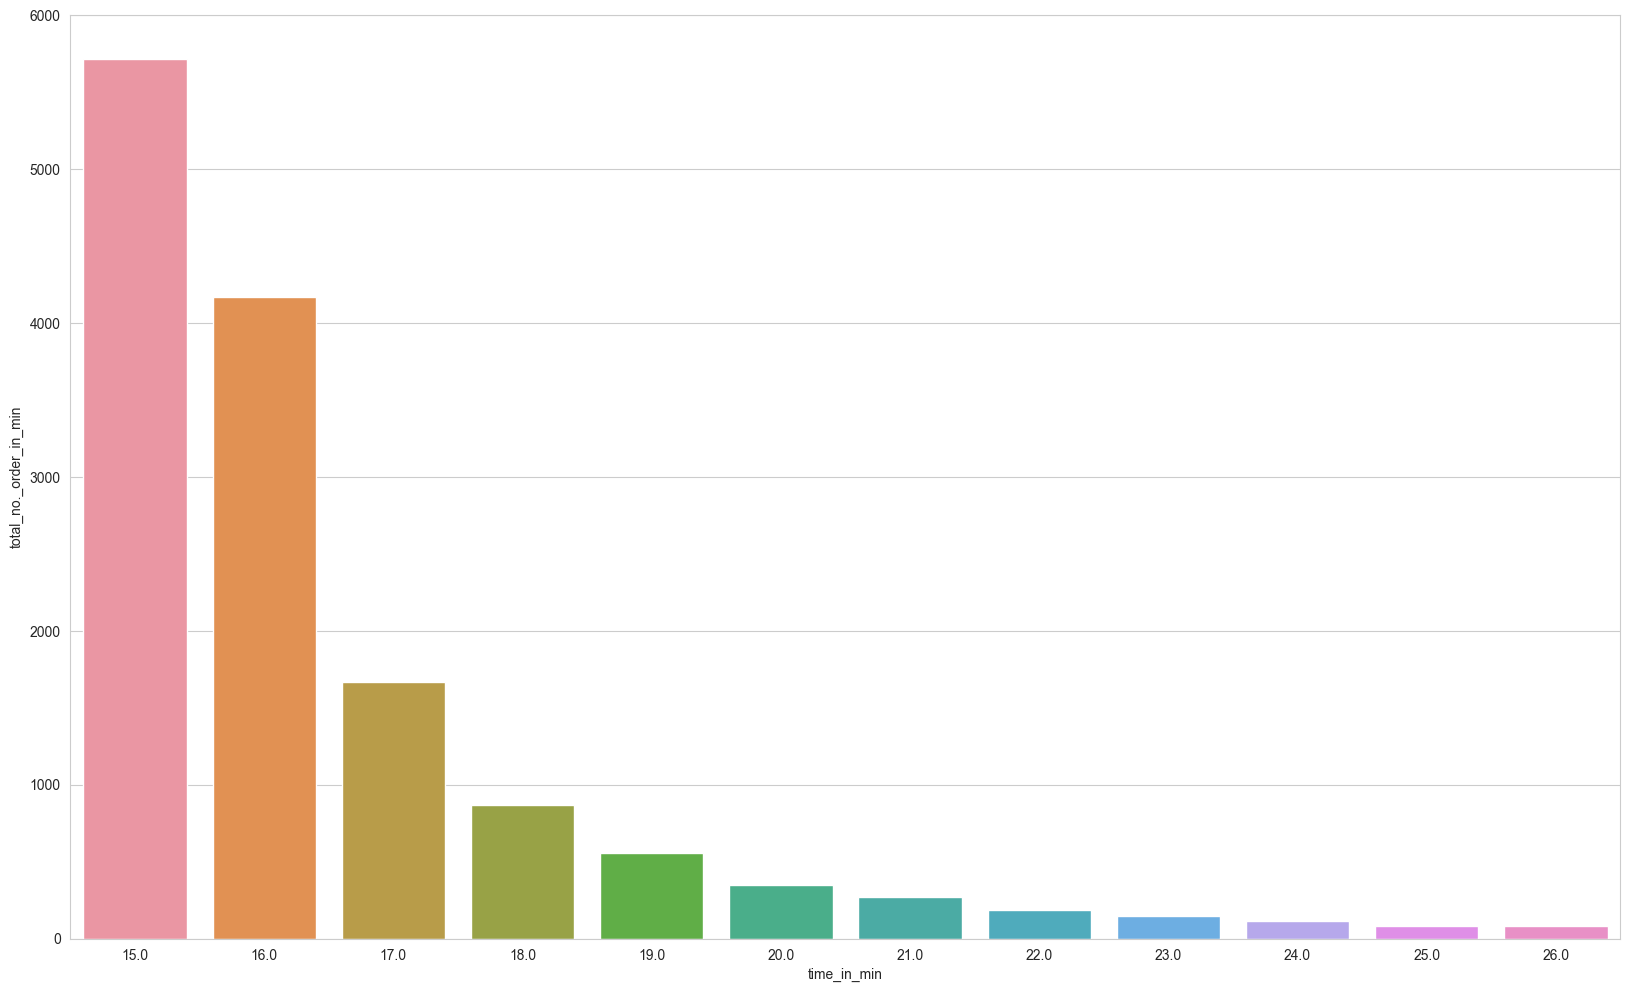

In [36]:
plt.figure(figsize=(20,12))
sns.barplot(x="time_in_min",y="total_no._order_in_min",data=gf4)

In [23]:
pf['day_of_week'] = df['order_time'].dt.day_name()

In [24]:
pf.head()

,order_id,order_placed_at,order_delivered_at,order_time,deliver_time,time_re,time_in_min,time_in_hours,day_of_week
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443,2023-03-01 00:00:59,2023-03-01 00:18:07.443,0 days 00:17:08.443000,17.0,0.0,Wednesday
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925,2023-03-01 00:03:59,2023-03-01 00:19:34.925,0 days 00:15:35.925000,16.0,0.0,Wednesday
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291,2023-03-01 00:07:22,2023-03-01 00:22:28.291,0 days 00:15:06.291000,15.0,0.0,Wednesday
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019,2023-03-01 00:07:47,2023-03-01 00:46:19.019,0 days 00:38:32.019000,39.0,1.0,Wednesday
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619,2023-03-01 00:09:03,2023-03-01 00:25:13.619,0 days 00:16:10.619000,16.0,0.0,Wednesday


In [25]:
gf6=pf.groupby("day_of_week").count()["order_id"].reset_index(name="no._order_day_wise")

In [26]:
gf6.sort_values(by="no._order_day_wise")

,day_of_week,no._order_day_wise
5,Tuesday,1582
3,Sunday,2191
2,Saturday,2209
0,Friday,2223
1,Monday,2256
6,Wednesday,2259
4,Thursday,2280


<AxesSubplot: xlabel='day_of_week', ylabel='no._order_day_wise'>

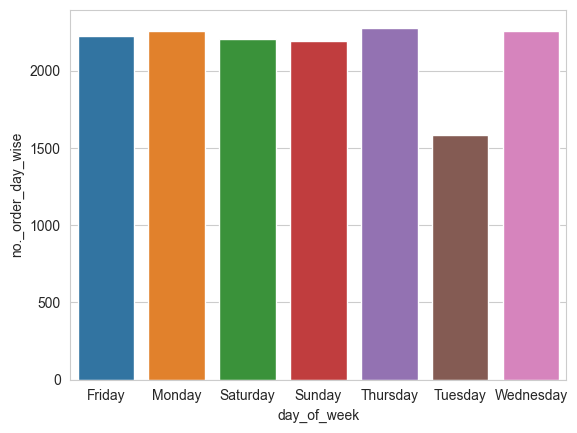

In [27]:
sns.set_style("whitegrid")
sns.barplot(x="day_of_week",y="no._order_day_wise",data=gf6)

evenly equal no. of order are placed on every days of week (except yuseday).